### Table of contents 

#### [Step 1. Data files and studying the general information. ](#1)  
#### [Step 2. Preparing the data.](#2)  
#### [Step 3. Analyze the data](#3)  
#### [Step 4. Test the hypotheses](#4)
#### [Step 5. Write an overall conclusion](#5)  

<a id="1"></a>

### Step 1. Open the data file and study the general information

In [1]:
#!pip install plotly -U
#!pip install scipy -U
#!pip install numpy -U
#!pip install pandas -U
#!pip install matplotlib -U

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 13.2 MB 67 kB/s s eta 0:00:01


In [6]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
df_users = pd.read_csv('/datasets/megaline_users.csv')
df_plans = pd.read_csv('/datasets/megaline_plans.csv')
df_calls = pd.read_csv('/datasets/megaline_calls.csv')
df_internet = pd.read_csv('/datasets/megaline_internet.csv')
df_messages = pd.read_csv('/datasets/megaline_messages.csv')

We have a data in a separate files and we are going to analyse each and create a single consolidated dataframe.

#### df_users dataframe - Info about users

In [7]:
# general info about tables
df_users.head(2)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN


In [8]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [9]:
df_users['churn_date'].notnull().sum()

34

In [10]:
# not null values 
churn = df_users[df_users['churn_date'].notnull()]
churn = churn[['user_id','churn_date']]
churn

,user_id,churn_date
6,1006,2018-12-18
12,1012,2018-11-16
22,1022,2018-09-07
40,1040,2018-12-30
50,1050,2018-10-07
54,1054,2018-12-31
67,1067,2018-11-24
83,1083,2018-12-18
84,1084,2018-11-11
94,1094,2018-12-12


 - Non-missing values (dates) in `churn_date` column mean that the client has stopped using the service when the data was retrieved. Still we can use the data for our analysis. Missing values mean that the client was using the calling plan when the data was retrieved.

#### df_plans dataframe - Description of plan/tariff types

In [11]:
# general info
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [12]:
# sample
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


 - This table contains information about tariffs' package

#### df_calls dataframe -  Calls log

In [13]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [14]:
# number of unique clients
len(df_calls['user_id'].unique())

481

In [15]:
df_calls.sample()

,id,user_id,call_date,duration
62254,1223_431,1223,2018-09-18,7.11


 - There are 137735 rows in this table that could be explained by saving all unique calls of user. A single user might have hundreds of calls per day, whereas the data is for a year.

#### df_internet dataframe - Web traffic

In [16]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [17]:
# unique clients data volume
len(df_internet['user_id'].unique())

489

In [18]:
df_internet.sample()

,id,user_id,session_date,mb_used
36486,1164_169,1164,2018-08-11,304.33


 - 104825 rows the same idea that data keeps unique id of every data that was used.

#### df_messages dataframe

In [19]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [20]:
# unique clients messaging
len(df_messages['user_id'].unique())

402

In [21]:
df_messages.sample()

,id,user_id,message_date
38812,1254_471,1254,2018-11-20


#### Conclusion
Having the general information we can process to preparation of our data for analysis that is all the columns including dates will be converted to datetime type, values which will be rounded up to whole numbers will be converted to integers for simplicity. Dataframes will be merged to create a single consolidated dataset.

<a id="2"></a>

### Step 2. Prepare the data

#####  - Convert the data to the necessary types & Find and eliminate errors in the data

In [22]:
# df_users
# converting date columns to datetime format
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'],format='%Y-%m-%d')
df_users.dtypes

user_id                int64
first_name            object
last_name             object
age                    int64
city                  object
reg_date      datetime64[ns]
plan                  object
churn_date    datetime64[ns]
dtype: object

In [23]:
# df_plans
# converting mb to gb and changing to int type since we dont need decimal points; and renaming column
df_plans['mb_per_month_included'] = np.ceil((df_plans['mb_per_month_included'] / 1024))
df_plans = df_plans.rename(columns={'mb_per_month_included': 'gb_per_month_included'})
df_plans['gb_per_month_included'] = df_plans['gb_per_month_included'].astype(int)
df_plans = df_plans.rename(columns={'plan_name': 'plan'})
df_plans.dtypes

messages_included          int64
gb_per_month_included      int64
minutes_included           int64
usd_monthly_pay            int64
usd_per_gb                 int64
usd_per_message          float64
usd_per_minute           float64
plan                      object
dtype: object

In [24]:
df_plans

,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan
0,50,15,500,20,10,0.03,0.03,surf
1,1000,30,3000,70,7,0.01,0.01,ultimate


 - `usd_per_message` and `usd_per_minute` are fixed amounts in cents where floating points must be used, thats logical.

In [25]:
#df_calls
# convert to datetime format
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')

In [26]:
# adding month column extracting it from call_date column
df_calls['month'] = pd.DatetimeIndex(df_calls["call_date"]).month

In [27]:
# rounding call duration up to upper value of minutes
df_calls['duration'] = np.ceil(df_calls['duration'])

In [28]:
# renaming id column for further analysis clarity
df_calls = df_calls.rename(columns={'id': 'call_id'})

In [29]:
df_calls.sample()

,call_id,user_id,call_date,duration,month
76605,1273_173,1273,2018-10-31,0.0,10


In [30]:
df_calls['duration'] = df_calls['duration'].astype(int)

In [31]:
# to check if there is any value between 0-1
df_calls['duration'].unique()

array([ 9, 14, 15,  6,  5,  3, 13,  2,  4, 10, 11,  1, 16,  0,  7,  8, 30,
       12, 19, 17, 22, 27, 21, 20, 18, 26, 23, 24, 25, 28, 33, 32, 29, 31,
       36, 38, 34, 37])

In [32]:
df_calls.dtypes

call_id              object
user_id               int64
call_date    datetime64[ns]
duration              int64
month                 int64
dtype: object

 - `duration` is rounded and its a whole number, convert to int.
 - `call_id` is an object type variable, since we dont need make any calculations on them, we leave it as it is.

In [33]:
#df_internet
# converting to datetime type
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')

In [34]:
# renaming id column for further analysis clarity
df_internet = df_internet.rename(columns={'id': 'internet_id'})

In [35]:
#adding month column extracting it from session_date column
df_internet['month'] = pd.DatetimeIndex(df_internet['session_date']).month

In [36]:
df_internet.sample()

,internet_id,user_id,session_date,mb_used,month
71765,1335_4,1335,2018-07-13,990.35,7


In [37]:
df_internet.dtypes

internet_id             object
user_id                  int64
session_date    datetime64[ns]
mb_used                float64
month                    int64
dtype: object

 - `mb_used`  individual web sessions are not rounded up, float type is ok. We will have monthly as gb used for each individual.

In [38]:
#df_messages
# converting column values to datetime
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')

In [39]:
df_messages = df_messages.rename(columns={'id': 'message_id'})

In [40]:
df_messages['month'] = pd.DatetimeIndex(df_messages['message_date']).month

In [41]:
df_messages.sample()

,message_id,user_id,message_date,month
70473,1458_171,1458,2018-11-08,11


In [42]:
df_messages.dtypes

message_id              object
user_id                  int64
message_date    datetime64[ns]
month                    int64
dtype: object

In [43]:
# For each user, find the number of calls made and minutes used per month and round up
calls = df_calls.pivot_table( index=['user_id', 'month'], values='duration', aggfunc=['count', 'sum'])
calls.columns = ['calls_per_month', 'mins_per_month']
calls['mins_per_month'] = np.ceil(calls['mins_per_month'])
calls['mins_per_month'] = calls['mins_per_month'].astype(int)
calls.reset_index(inplace=True)
calls.sample()

,user_id,month,calls_per_month,mins_per_month
222,1053,12,47,311


In [44]:
# For each user, find the volume of data per month, resetting index
internet = df_internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc=['sum'])
internet.columns=['gb_used_per_month']
internet['gb_used_per_month'] = np.ceil(internet['gb_used_per_month']/1024)
internet['gb_used_per_month'] = internet['gb_used_per_month'].astype(int)
internet.reset_index(inplace=True)
internet.sample()

,user_id,month,gb_used_per_month
1278,1268,11,29


In [45]:
# For each user, find the number of text messages sent per month
messages = df_messages.pivot_table(index=['user_id', 'month'], values='message_date', aggfunc='count')
messages.columns=['messages_per_month']
messages['messages_per_month'] = messages['messages_per_month'].astype(int)
messages.reset_index(inplace=True)
messages.sample()

,user_id,month,messages_per_month
308,1088,8,42


In [46]:
# merging created tables
merge1 = pd.merge(left= calls, right= internet, how='outer', on=['user_id', 'month']).fillna(0)
merge2 = pd.merge(left=merge1, right = messages, how='outer', on=['user_id','month']).fillna(0)
print(len(merge2))
merge2.sample()

2293


,user_id,month,calls_per_month,mins_per_month,gb_used_per_month,messages_per_month
1901,1412,10,142.0,1020.0,17.0,47.0


In [47]:
# merging two initial dataset
merge3 = pd.merge(left=df_users, right=df_plans, on='plan', how='inner')
merge3.sample()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
25,1069,Dino,Fry,31,"Houston-The Woodlands-Sugar Land, TX MSA",2018-09-17,ultimate,NaT,1000,30,3000,70,7,0.01,0.01


In [48]:
# consolidated data, merging all data
data = pd.merge(left=merge3, right=merge2, on='user_id')
print(len(data))
data.sample()

2293


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,month,calls_per_month,mins_per_month,gb_used_per_month,messages_per_month
1623,1280,Jasper,Berry,29,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-23,surf,NaT,50,15,500,20,10,0.03,0.03,9,68.0,445.0,18.0,31.0


In [49]:
# info about prepared data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                2293 non-null   int64         
 1   first_name             2293 non-null   object        
 2   last_name              2293 non-null   object        
 3   age                    2293 non-null   int64         
 4   city                   2293 non-null   object        
 5   reg_date               2293 non-null   datetime64[ns]
 6   plan                   2293 non-null   object        
 7   churn_date             158 non-null    datetime64[ns]
 8   messages_included      2293 non-null   int64         
 9   gb_per_month_included  2293 non-null   int64         
 10  minutes_included       2293 non-null   int64         
 11  usd_monthly_pay        2293 non-null   int64         
 12  usd_per_gb             2293 non-null   int64         
 13  usd

In [50]:
data.duplicated().sum()

0

 - We can change data types to int as we rounded up and we dont need decimals

In [51]:
# changing data type and double check
data['calls_per_month'] = data['calls_per_month'].astype(int)
data['mins_per_month'] = data['mins_per_month'].astype(int)
data['gb_used_per_month'] = data['gb_used_per_month'].astype(int)
data['messages_per_month'] = data['messages_per_month'].astype(int)
data.dtypes

user_id                           int64
first_name                       object
last_name                        object
age                               int64
city                             object
reg_date                 datetime64[ns]
plan                             object
churn_date               datetime64[ns]
messages_included                 int64
gb_per_month_included             int64
minutes_included                  int64
usd_monthly_pay                   int64
usd_per_gb                        int64
usd_per_message                 float64
usd_per_minute                  float64
month                             int64
calls_per_month                   int64
mins_per_month                    int64
gb_used_per_month                 int64
messages_per_month                int64
dtype: object

In [52]:
# 0 mins talked means calls are missed or didnt talk at all
missed_calls = data.query('mins_per_month=="0"')
#print('Number of missed calls:',len(missed_calls))
missed_calls.head(2)
len(data.query('mins_per_month=="0" and age >40'))

0

 - We can see that clients who havent talked even a minute, are using other data like internet, messages as well. Majority of clients are more than 40 years old. There is no robust clue to get rid of them.

#### `monthly_revenue` column. 

In [53]:
def revenue(row):
    #by using row accessor we will take each row of each column separately
    # user info
    user_id = row['user_id']
    mins = row['mins_per_month']
    text_messages= row['messages_per_month']
    total_gb = row['gb_used_per_month']
    
    # plan info
    plan = row['plan']
    gb_included = row['gb_per_month_included']
    messages_included = row['messages_included']
    minutes_included = row['minutes_included']
    monthly_charge = row['usd_monthly_pay']
    usd_gb = row['usd_per_gb']
    usd_message = row['usd_per_message']
    usd_min = row['usd_per_minute']
    
    # calculation of remaining balance/ # subtract the free package limit from the totals
    mins_balance = mins - minutes_included
    messages_balance = text_messages - messages_included
    gb_balance = total_gb - gb_included
    
    # multiply the result by the calling plan value, created extra cost with initial balance of 0, when it is bigger than 0, overchage counts.
    extra_cost_mins = 0
    extra_cost_messages = 0
    extra_cost_gb = 0
    
    if mins_balance > 0:
        extra_cost_mins = mins_balance * usd_min
    if messages_balance > 0:
        extra_cost_messages = messages_balance * usd_message
    if gb_balance > 0:
        extra_cost_gb = gb_balance * usd_gb
        
    # add the monthly charge depending on the calling plan
    monthly_revenue = monthly_charge + (extra_cost_mins + extra_cost_messages + extra_cost_gb)
    
    return monthly_revenue
# adding new column of monthly revenues
data['monthly_revenue'] = data.apply(revenue, axis=1)

In [54]:
data.sample()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,messages_included,gb_per_month_included,...,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,month,calls_per_month,mins_per_month,gb_used_per_month,messages_per_month,monthly_revenue
633,1453,Robt,Tyler,51,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-07-09,ultimate,NaT,1000,30,...,70,7,0.01,0.01,11,38,303,17,38,70.0


#### Conclusion

 In this step, we converted all data columns' type to datetime. Added month column for each dataset such as `df_calls`, `df_internet`, `df_messages`. Calculated monthly usage of these packages. Finally added `monthly_revenue` from clients for our further analysis. We have now `data` dataframe with all information combined about users' tariff plan, their monthly usage of them and revenue from each client. In our further analysis, we will use `data` dataset as a source of creating new tables and subsets.

<a id="3"></a>

### Step 3. Analyze the data

##### Describe the customers' behavior. Find the minutes, texts, and volume of data the users of each plan require per month. Calculate the mean, dispersion, and standard deviation. Plot histograms. Describe the distributions.

In [55]:
# filtering data for analysis, extracting info which are to be used 
filtered_data = data[['user_id','month',  'plan', 'calls_per_month', 'mins_per_month', 'gb_used_per_month', 'messages_per_month', 'monthly_revenue']]
filtered_data.sample()

,user_id,month,plan,calls_per_month,mins_per_month,gb_used_per_month,messages_per_month,monthly_revenue
253,1164,9,ultimate,62,450,14,29,70.0


In [56]:
filtered_data.shape

(2293, 8)

- <b>Note</b>: 2293 rows mean for each user there are several monthly revenues taken from `month` column. 

In [57]:
# filtering plans, creating new dataframes for two different plans
plan_surf = filtered_data.query('plan=="surf"')
plan_ultimate = filtered_data.query('plan=="ultimate"')
total_clients =  len(filtered_data['user_id'].unique())
surf_clients = len(plan_surf['user_id'].unique())
share_surf = surf_clients / total_clients
print('Total number of clients:', total_clients)
print('Number of clients using surf plan:', surf_clients)
ulti_clients = len(plan_ultimate['user_id'].unique())
share_ulti = ulti_clients / total_clients
print('Number of clients using ultimate plan:', ulti_clients)
print('Share of surf plan clients:{:.2%}'.format(share_surf))
print('Share of ulti plan clients:{:.2%}'.format(share_ulti))


Total number of clients: 490
Number of clients using surf plan: 333
Number of clients using ultimate plan: 157
Share of surf plan clients:67.96%
Share of ulti plan clients:32.04%


 - Majority of clients use Surf tariff rather than Ultimate.

#### Surf_plan variable 

In [58]:
plan_surf.shape

(1573, 8)

In [59]:
# descriptive stats for surf plan # calculation of mean, dispersion and standard deviation, removing outliers
plan_surf.describe().round(2)

,user_id,month,calls_per_month,mins_per_month,gb_used_per_month,messages_per_month,monthly_revenue
count,1573.00,1573.00,1573.00,1573.00,1573.00,1573.00,1573.00
mean,1242.76,9.18,59.81,428.75,16.67,31.16,60.71
std,139.23,2.47,32.02,234.45,7.85,33.57,55.39
min,1001.00,1.00,0.00,0.00,0.00,0.00,20.00
25%,1120.00,8.00,39.00,272.00,12.00,3.00,20.00
50%,1245.00,10.00,60.00,425.00,17.00,24.00,40.36
75%,1358.00,11.00,79.00,576.00,21.00,47.00,80.36
max,1499.00,12.00,205.00,1510.00,70.00,266.00,590.37


 - On average, people who are using surf plan, make 60 calls, talk 429 minutes, use data amounted to 16.7 gb, and send 31 text messages per month and revenue is 60.71 USD per customer.
 - It is worth to mention that the total cost of Surf plan is  20 USD but the average monthly revenue is tripled amount 60.71 USD. 
 - The highest monthly profit is 590.37 USD, alas, outlier at the same time!

`calls_per_month` median and mean are equal = 60. No need to look deeper for outliers.<br>
`mins_per_month` median=425 and mean=428, almost the same.<br>
`gb_used_per_month` median and mean ~ 17.<br>
`messages_per_month` median=24, mean=31. Most probably, there are some outliers pushing mean a little up. We will calculate with IQR score method and box plot. <br>
`monthly_revenue` median=40, mean=60. Same here with outliers, we are going to find them and get rid of them.

<AxesSubplot:>

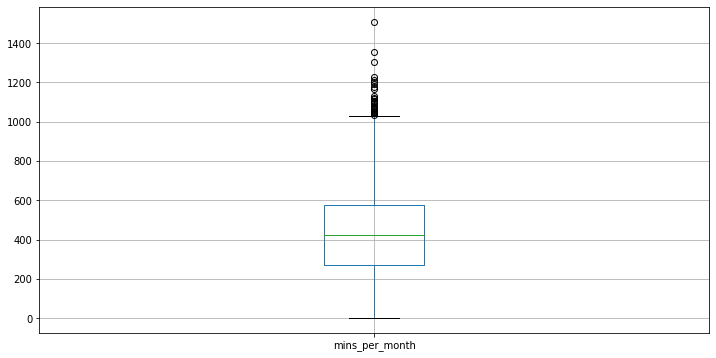

In [60]:
# detecting otliers using box plot, mins_per_month
plan_surf.boxplot(column=['mins_per_month'], figsize=(12,6))

 - <b><font color="purple"> On the boxplot above, we can observe the minutes talked per month above 1000 as outliers since they are not included in the box of other observation i.e nowhere near quartiles.  </font></b>

<AxesSubplot:>

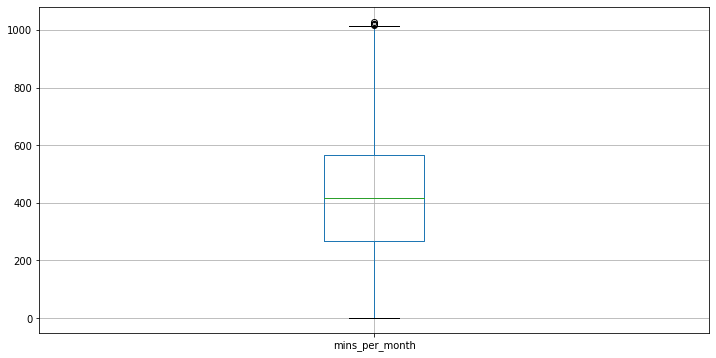

In [61]:
# removing outliers with IQR score method double cheking with box plot
# mins_per_month column
Q1_mins_surf = plan_surf['mins_per_month'].quantile(0.25)
Q3_mins_surf = plan_surf['mins_per_month'].quantile(0.75)
IQR_mins_surf = Q3_mins_surf - Q1_mins_surf
plan_surf = plan_surf.query('mins_per_month > @Q1_mins_surf - 1.5 * @IQR_mins_surf and mins_per_month < @Q3_mins_surf + 1.5 * @IQR_mins_surf')
plan_surf.boxplot(column=['mins_per_month'], figsize=(12,6))

 - <b><font color="purple">  This boxplot after implementing IQR scoring method for outliers' removal. We can clearly see that there is no data above upper bound of the data. The median of mins talked per month is 425:(green line cutting the box from the middle). The data is positively skewed since majority of the data is on the third quartile or on 75% percentile in other words.  </font></b><br>
**Note:** We have to run the code multiple times to completely remove outliers from our data.

<AxesSubplot:>

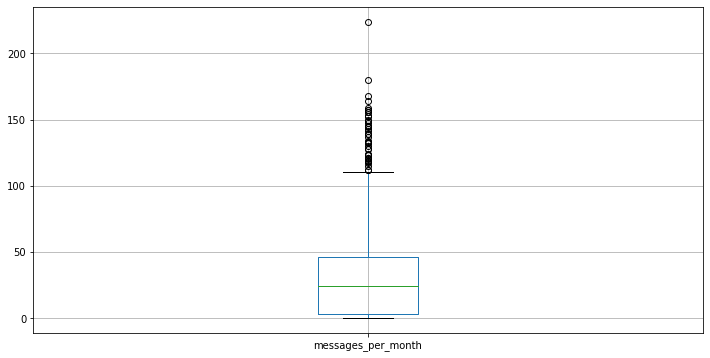

In [62]:
# detecting otliers using box plot, messages_per_month column
plan_surf.boxplot(column=['messages_per_month'], figsize=(12,6))

 - <b><font color="purple"> There is no outliers on the lower bound but if we look at upper bound, above 100 messages are outliers.  </font></b>

<AxesSubplot:>

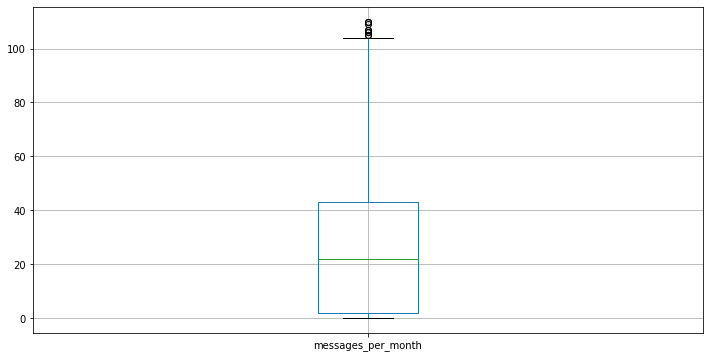

In [63]:
# removing outliers with IQR score method; double check with box plot
# messages_per_month column
Q1_messages_surf = plan_surf['messages_per_month'].quantile(0.25)
Q3_messages_surf = plan_surf['messages_per_month'].quantile(0.75)
IQR_messages_surf = Q3_messages_surf - Q1_messages_surf
plan_surf = plan_surf.query('messages_per_month > @Q1_messages_surf - 1.5 * @IQR_messages_surf and messages_per_month < @Q3_messages_surf + 1.5 * @IQR_messages_surf')
plan_surf.boxplot(column=['messages_per_month'], figsize=(12,6))

 - <b><font color="purple"> We can see the boxplot is now clear of outliers. In case of messages sent per month we can see the distribution is mainly on the range 2 to 42 messages. Median = 24, meaning every second user of Surf plan send 24 messages per month. </font></b>

<AxesSubplot:>

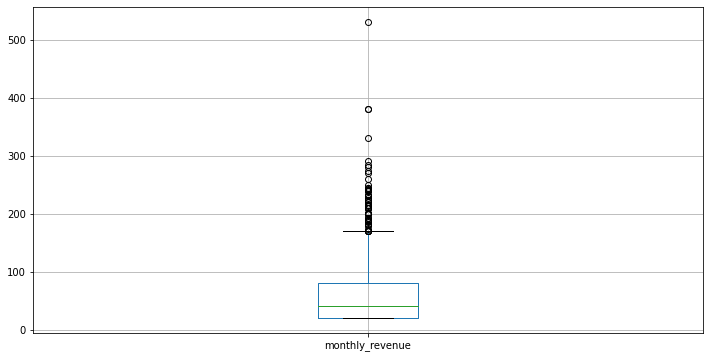

In [64]:
# detecting otliers using box plot, monthly_revenue column
plan_surf.boxplot(column=['monthly_revenue'], figsize=(12,6))

 - <b><font color="purple"> Monthly revenue above 180 are outliers as they are far from the boxplot. </font></b>

<AxesSubplot:>

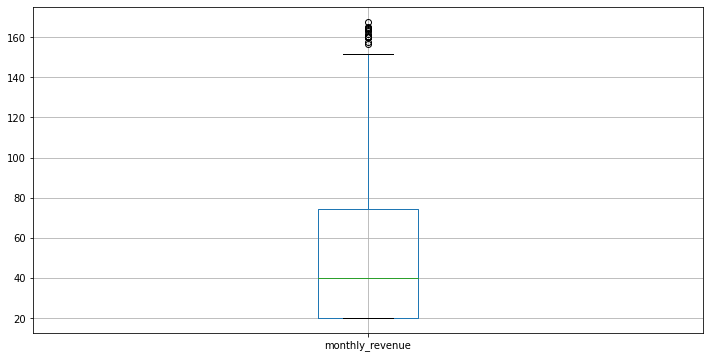

In [65]:
# removing outliers with IQR score method; double check with box plot
# monthly_revenue column
Q1_rev_surf = plan_surf['monthly_revenue'].quantile(0.25)
Q3_rev_surf = plan_surf['monthly_revenue'].quantile(0.75)
IQR_rev_surf = Q3_rev_surf - Q1_rev_surf
plan_surf = plan_surf.query('monthly_revenue > @Q1_rev_surf - 1.5 * @IQR_rev_surf and monthly_revenue < @Q3_rev_surf + 1.5 * @IQR_rev_surf')
plan_surf.boxplot(column=['monthly_revenue'], figsize=(12,6))

 - <b><font color="purple"> The monthly revenue from clients distribution is obvious where the range of from median to Q3 is larger than Q1 to median', where median is 38. Data is skewed to the right. </font></b> <br>
**Note:** We need to run the code multiple times to remove outliers completely.

In [66]:
# checking after outlier removal
plan_surf.shape

(1439, 8)

#### Ultimate_plan variable

In [67]:
plan_ultimate.shape

(720, 8)

In [68]:
## descriptive stats for ultimate plan
plan_ultimate.describe().round(2)

,user_id,month,calls_per_month,mins_per_month,gb_used_per_month,messages_per_month,monthly_revenue
count,720.00,720.00,720.00,720.00,720.00,720.00,720.00
mean,1253.33,9.15,60.63,430.45,17.31,37.55,72.31
std,150.92,2.56,33.24,240.51,7.67,34.77,11.40
min,1000.00,1.00,0.00,0.00,0.00,0.00,70.00
25%,1126.00,8.00,36.00,260.00,13.00,7.00,70.00
50%,1241.50,10.00,61.00,424.00,17.00,30.00,70.00
75%,1401.00,11.00,80.00,565.25,21.00,61.00,70.00
max,1497.00,12.00,191.00,1369.00,46.00,166.00,182.00


 - On average, people who are using ultimate plan, make 61 calls, talk 430 minutes, use data amounted to 17.3 gb, and send 37 text messages per month and revenue is 72.31 USD per customer.
 - The highest monthly income per client is 182 USD. Another client from the same dream and outlier at the same time.

`calls_per_month` --> median=61 and mean=60.6. Not significant difference<br>
`mins_per_month` --> median=424 and mean=430.4. Not significant difference in terms of minutes<br>
`gb_used_per_month` --> median=17 and mean=17.3. Equality.<br>
`messages_per_month` --> median=30, mean=37.5. A little high mean than median. We will check for outliers.<br>
`monthly_revenue` --> median=70, mean=72.31 . Almost equal, we will double check with box plot. We can't use IQR scoring method since our 25 and 75 quantiles are equal = 70.

<AxesSubplot:>

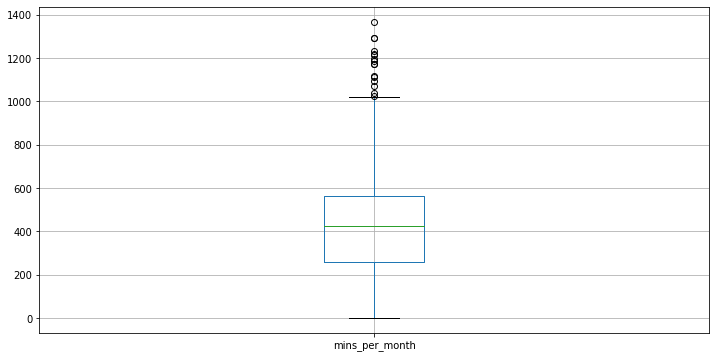

In [69]:
# detecting otliers using box plot, mins_per_month
plan_ultimate.boxplot(column=['mins_per_month'], figsize=(12,6))

 - <b><font color="purple"> On the boxplot above, we can clearly see that the data above 1000 mins per month for Ultimate plan users are outliers as they are out of the box. We dont have lower bound outliers. </font></b>

<AxesSubplot:>

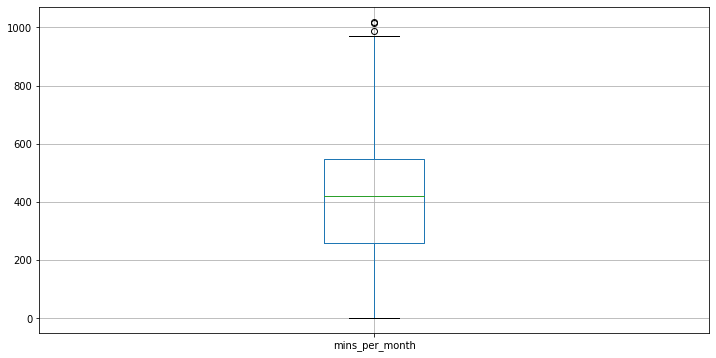

In [70]:
# removing outliers with IQR score method double cheking with box plot
# mins_per_month column
Q1_mins_ulti = plan_ultimate['mins_per_month'].quantile(0.25)
Q3_mins_ulti = plan_ultimate['mins_per_month'].quantile(0.75)
IQR_mins_ulti = Q3_mins_ulti - Q1_mins_ulti
plan_ultimate = plan_ultimate.query('mins_per_month > @Q1_mins_ulti - 1.5 * @IQR_mins_ulti and mins_per_month < @Q3_mins_ulti + 1.5 * @IQR_mins_ulti')
plan_ultimate.boxplot(column=['mins_per_month'], figsize=(12,6))

 - <b><font color="purple"> On the contrary to Surf plan, here we can observe that the data has a negative skew, where the median is 424. Every second user of Ultimate plan talked about 424 minutes in a month. </font></b>

<AxesSubplot:>

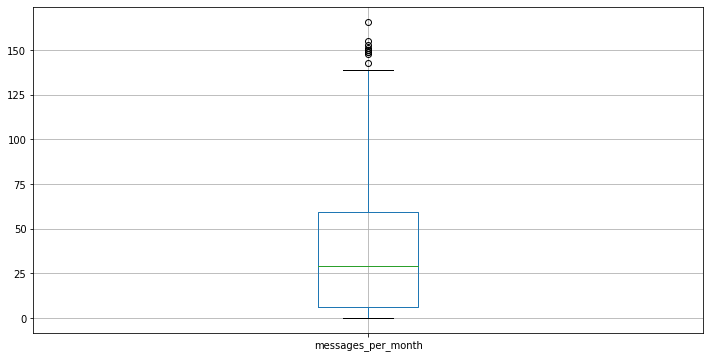

In [71]:
# detecting otliers using box plot, messages_per_month
plan_ultimate.boxplot(column=['messages_per_month'], figsize=(12,6))

 - <b><font color="purple">  The amount of messages sent more than 130 are considered to be the outliers of the data as they are not in the box. We will remove the outliers with the following line of codes below. </font></b>

<AxesSubplot:>

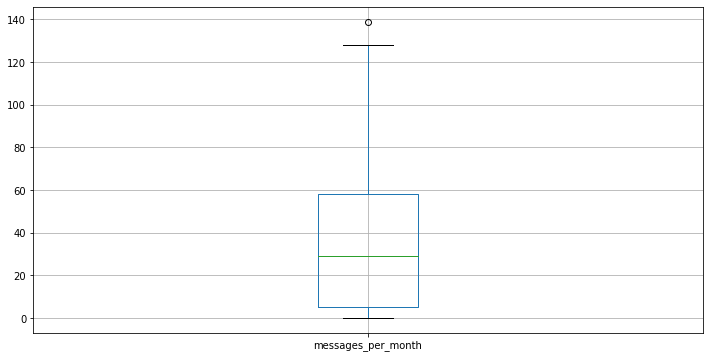

In [72]:
# removing outliers with IQR score method.
# messages_per_month column
Q1_messages_ulti = plan_ultimate['messages_per_month'].quantile(0.25)
Q3_messages_ulti = plan_ultimate['messages_per_month'].quantile(0.75)
IQR_messages_ulti = Q3_messages_ulti - Q1_messages_ulti
plan_ultimate = plan_ultimate.query('messages_per_month > @Q1_messages_ulti - 1.5 * @IQR_messages_ulti and messages_per_month < @Q3_messages_ulti + 1.5 * @IQR_messages_ulti')
plan_ultimate.boxplot(column=['messages_per_month'], figsize=(12,6))

 - <b><font color="purple"> The data on messages per month has a positive skew where the mean is greater than the median.</font></b>

<AxesSubplot:>

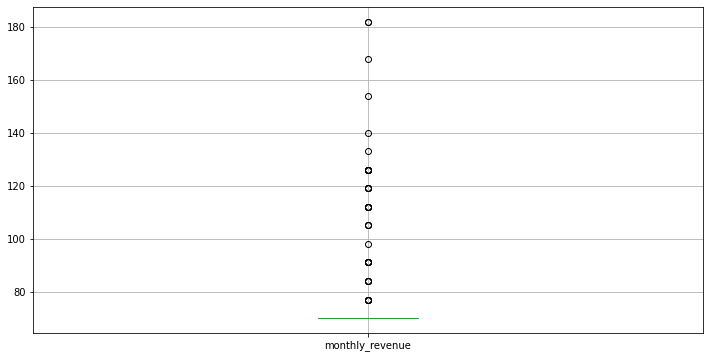

In [73]:
# detecting otliers using box plot
plan_ultimate.boxplot(column=['monthly_revenue'], figsize=(12,6))

 - Quite unusual box plot if you agree. It could be explained that the minimum revenue from clients is equal to its monthly price which is 70. There is no value below 70 but only higher and they are distributed unequally.

IQR: 0.0


<AxesSubplot:>

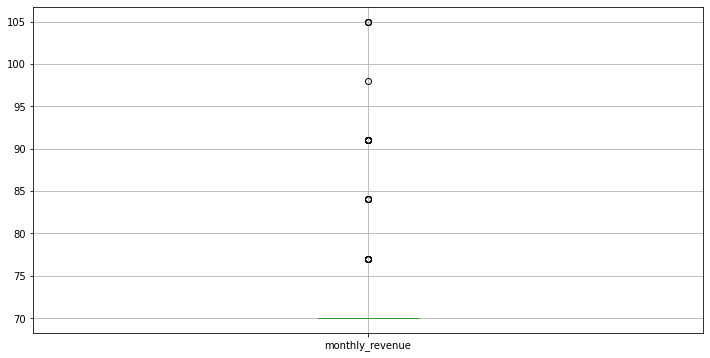

In [74]:
# monthly_revenue column
# since IQR is 0 in our case, we will take mean to calculate upper limit
Q1_rev_ulti = plan_ultimate['monthly_revenue'].quantile(0.25)
Q3_rev_ulti = plan_ultimate['monthly_revenue'].quantile(0.75)
IQR = Q1_rev_ulti - Q3_rev_ulti
print('IQR:',IQR)
# using upper bound value as a limit; mean times 1.5, values greater than the result are considered as outliers
mean = plan_ultimate['monthly_revenue'].mean()
upper_bound = 1.5 *  mean 
plan_ultimate = plan_ultimate.query('monthly_revenue < @upper_bound')
plan_ultimate.boxplot(column=['monthly_revenue'], figsize=(12,6))

 - <b><font color="purple"> We can observe that the monthly revenue from Ultimate plan users is distributed unequally, where the minimum revenue is equal to its price.  </font></b>

In [75]:
# descriptive stats of revenue
plan_ultimate['monthly_revenue'].describe()

count    673.000000
mean      70.520059
std        3.439957
min       70.000000
25%       70.000000
50%       70.000000
75%       70.000000
max      105.000000
Name: monthly_revenue, dtype: float64

In [76]:
plan_ultimate.shape

(673, 8)

In [77]:
# calculation of mean, dispersion and standard deviation, SURF plan
mins_mean_surf =  plan_surf['mins_per_month'].mean()
text_mean_surf= plan_surf['messages_per_month'].mean()
data_mean_surf= plan_surf['gb_used_per_month'].mean()

mins_var_surf=  plan_surf['mins_per_month'].var()
text_var_surf= plan_surf['messages_per_month'].var()
data_var_surf= plan_surf['gb_used_per_month'].var()

mins_std_surf=  plan_surf['mins_per_month'].std()
text_std_surf= plan_surf['messages_per_month'].std()
data_std_surf= plan_surf['gb_used_per_month'].std()

# calculation of mean, dispersion and standard deviation, SURF plan
mins_mean_ulti = plan_ultimate['mins_per_month'].mean()
text_mean_ulti= plan_ultimate['messages_per_month'].mean()
data_mean_ulti= plan_ultimate['gb_used_per_month'].mean()

mins_var_ulti=  plan_ultimate['mins_per_month'].var()
text_var_ulti= plan_ultimate['messages_per_month'].var()
data_var_ulti= plan_ultimate['gb_used_per_month'].var()

mins_std_ulti=  plan_ultimate['mins_per_month'].std()
text_std_ulti= plan_ultimate['messages_per_month'].std()
data_std_ulti= plan_ultimate['gb_used_per_month'].std()

print('Surf plan total minutes: Mean = %d, Variance = %d, Std = %d'% (mins_mean_surf, mins_var_surf, mins_std_surf))
print('Ultimate plan total minutes: Mean = %d, Variance = %d, Std = %d'% (mins_mean_ulti, mins_var_ulti, mins_std_ulti))
print('Surf plan total text_messages: Mean = %d, Variance = %d, Std = %d'% (text_mean_surf, text_var_surf, text_std_surf))
print('Ultimate plan total text_messages: Mean = %d, Variance = %d, Std = %d'% (text_mean_surf, text_var_surf, text_std_ulti))
print('Surf plan total data usage: Mean = %d, Variance = %d, Std = %d'% (data_mean_surf, data_var_surf, data_std_surf))
print('Ultimate plan total data usage: Mean = %d, Variance = %d, Std = %d'% (data_mean_ulti, data_var_ulti, data_std_ulti))

Surf plan total minutes: Mean = 408, Variance = 44813, Std = 211
Ultimate plan total minutes: Mean = 414, Variance = 44754, Std = 211
Surf plan total text_messages: Mean = 26, Variance = 687, Std = 26
Ultimate plan total text_messages: Mean = 26, Variance = 687, Std = 31
Surf plan total data usage: Mean = 15, Variance = 41, Std = 6
Ultimate plan total data usage: Mean = 16, Variance = 45, Std = 6


In [78]:
plan_surf.describe().round()

,user_id,month,calls_per_month,mins_per_month,gb_used_per_month,messages_per_month,monthly_revenue
count,1439.0,1439.0,1439.0,1439.0,1439.0,1439.0,1439.0
mean,1240.0,9.0,57.0,409.0,16.0,27.0,51.0
std,140.0,2.0,29.0,212.0,6.0,26.0,37.0
min,1001.0,1.0,0.0,0.0,0.0,0.0,20.0
25%,1117.0,8.0,37.0,258.0,12.0,2.0,20.0
50%,1239.0,10.0,57.0,413.0,17.0,21.0,40.0
75%,1358.0,11.0,78.0,560.0,20.0,42.0,75.0
max,1499.0,12.0,150.0,1029.0,29.0,110.0,168.0


In [79]:
plan_ultimate.describe().round()

,user_id,month,calls_per_month,mins_per_month,gb_used_per_month,messages_per_month,monthly_revenue
count,673.0,673.0,673.0,673.0,673.0,673.0,673.0
mean,1257.0,9.0,58.0,414.0,16.0,34.0,71.0
std,150.0,3.0,29.0,212.0,7.0,31.0,3.0
min,1000.0,1.0,0.0,0.0,0.0,0.0,70.0
25%,1128.0,7.0,36.0,260.0,13.0,5.0,70.0
50%,1246.0,10.0,60.0,419.0,17.0,28.0,70.0
75%,1403.0,11.0,78.0,544.0,20.0,55.0,70.0
max,1497.0,12.0,149.0,1020.0,35.0,139.0,105.0


 - <b><font color="purple"> Above, the descriptive statistics after removing outliers from both tariff plans. Talking about number of calls and minutes per month, it is quiet interesting to see that on average Ultimate users make 2 more calls per month, (58 to 56) but the duration of calls are shorter than Surf users. Every second user of Ultimate plan spends 17 gb of internet which is only 1 gb more than Surf users. The main indicator that affects decision making is the revenue genereted from the users of each plan. The average revenue from Surf plan users is 49 USD with the standard deviation of 34 meaning the revenues from each client differ heavily, whereas the average revenue from Ulmitate plan users 71 with std= 3, revenue values are close to the average.  </font></b>

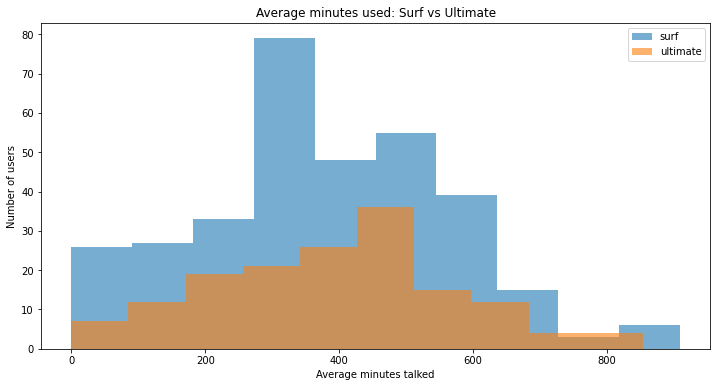

In [80]:
# histogram for each user, average mins
surf_hist_mins =  plan_surf.pivot_table(index=['user_id', 'plan'], values='mins_per_month', aggfunc='mean')
ulti_hist_mins =  plan_ultimate.pivot_table(index=['user_id', 'plan'], values='mins_per_month', aggfunc='mean')

plt.figure(figsize=(12,6))
plt.hist(surf_hist_mins, alpha=0.6, label='surf')
plt.hist(ulti_hist_mins, alpha=0.6, label='ultimate')
plt.xlabel('Average minutes talked')
plt.ylabel('Number of users')
plt.title('Average minutes used: Surf vs Ultimate')
plt.legend()

 - As we see from histogram above, data of Surf plan has a positive skew, whereas Ultimate stats show a little skew to the left. Although the number of users of Surf tariff is higher than ulti, their average minutes talked almost the same. 

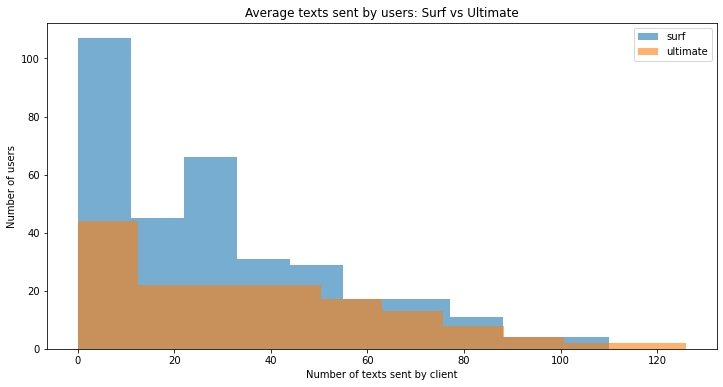

In [81]:
# histogram for each user, average texts
surf_hist_text =  plan_surf.pivot_table(index=['user_id', 'plan'], values='messages_per_month', aggfunc='mean')
ulti_hist_text =  plan_ultimate.pivot_table(index=['user_id', 'plan'], values='messages_per_month', aggfunc='mean')

plt.figure(figsize=(12,6))
plt.hist(surf_hist_text, alpha=0.6, label='surf')
plt.hist(ulti_hist_text, alpha=0.6, label='ultimate')
plt.xlabel('Number of texts sent by client')
plt.ylabel('Number of users')
plt.title('Average texts sent by users: Surf vs Ultimate')
plt.legend()

 - Both data has positive skew. Ultimate tariff user send text messages more often than Surf with an average of 34 and 26 text messages per month respectively.

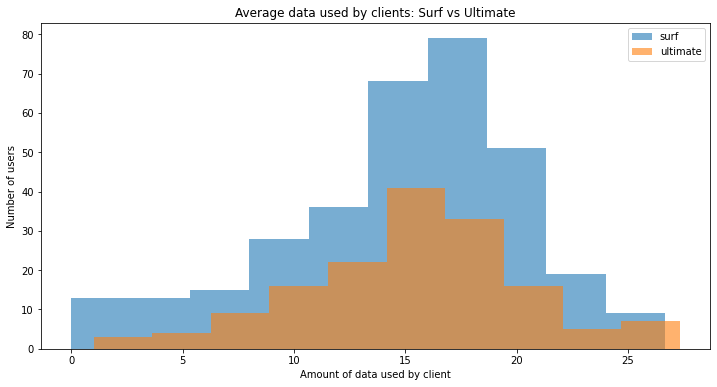

In [82]:
# histogram for each user, average texts
surf_hist_gb =  plan_surf.pivot_table(index=['user_id', 'plan'], values='gb_used_per_month', aggfunc='mean')
ulti_hist_gb =  plan_ultimate.pivot_table(index=['user_id', 'plan'], values='gb_used_per_month', aggfunc='mean')

plt.figure(figsize=(12,6))
plt.hist(surf_hist_gb, alpha=0.6, label='surf')
plt.hist(ulti_hist_gb, alpha=0.6, label='ultimate')
plt.xlabel('Amount of data used by client')
plt.ylabel('Number of users')
plt.title('Average data used by clients: Surf vs Ultimate')
plt.legend()

 - 75 % of both tariff plan users use data up to 20 gbs per month, whereas the mean is 16 for Ultimate and 15 for Surf users. Both data has a positive skew.

#### Conclusion

 - <b><font color="purple"> In this part of our project, we looked through each tariff plans. First of all, we detected and removed the outliers using the IQR scoring method and boxplots for each plan separately. Then, after getting rid of outliers we analysed the behavior of both plan groups by looking at their calls, minutes talked, amount of data used per month. Additionally, we have calculated the mean, standard devation and variances. On the next step, we plotted histograms to see the differences/similarities, distribution of the client's data.  </font></b>

<a id="4"></a>

### Step 4. Test the hypotheses

##### - The average revenue from users of Ultimate and Surf calling plans differs.

###### H0: The average revenue of Ultimate and Surf users are equal .
###### H1: The average revenue of Ultimate and Surf users are not equal.

Following the logic that H0 always starts with equal, we set up the null hypothesis

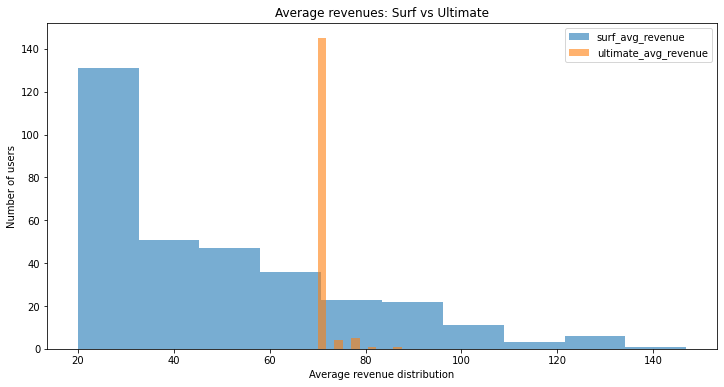

In [83]:
# we plot histogram to see the distribution of revenues
surf_hist_rev = plan_surf.pivot_table(index=['user_id', 'plan'], values='monthly_revenue', aggfunc='mean').round(2)
ulti_hist_rev = plan_ultimate.pivot_table(index=['user_id', 'plan'], values='monthly_revenue', aggfunc='mean').round(2)
plt.figure(figsize=(12,6))
plt.hist(surf_hist_rev, alpha=0.6, label='surf_avg_revenue',)
plt.hist(ulti_hist_rev, alpha=0.6, label='ultimate_avg_revenue',)
plt.xlabel('Average revenue distribution')
plt.ylabel('Number of users')
plt.title('Average revenues: Surf vs Ultimate')
plt.legend()

 - We plotted histogram to see the revenue distribution of two samples. Revenue from  than 140 users of Ultimate plan is 71 USD, whereas majority of Surf tariff users bring 20-30 USD per month. 

In [84]:
# Average revenues and variances
mean_rev_surf =  plan_surf['monthly_revenue'].mean()
mean_rev_ulti = plan_ultimate['monthly_revenue'].mean()
var_rev_surf = plan_surf['monthly_revenue'].var()
var_rev_ulti = plan_ultimate['monthly_revenue'].var()
print('Average revenue Surf:{:.2f}'.format(mean_rev_surf))
print('Average revenue Ultimate:{:.2f}'. format(mean_rev_ulti))
print('Revenue variance Surf:{:.2f}'. format(var_rev_surf))
print('Revenue variance Ultimate:{:.2f}'. format(var_rev_ulti))

Average revenue Surf:51.36
Average revenue Ultimate:70.52
Revenue variance Surf:1361.42
Revenue variance Ultimate:11.83


In [85]:
# taking sample from ultimate plan with size of 50 of each user_id
sample_ultimate = plan_ultimate.pivot_table(index=['user_id', 'plan'], values='monthly_revenue', aggfunc='mean').sample(50)

# taking sample from surf plan with size of 50
sample_surf = plan_surf.pivot_table(index=['user_id', 'plan'], values='monthly_revenue', aggfunc='mean').sample(50)

# critical significance level
alpha = 0.05

# variances are not equal
results = st.ttest_ind(sample_ultimate, sample_surf, equal_var=False)
print('p-value', results.pvalue)
if (results.pvalue < alpha):
    print('Reject the null hypothesis: The average revenue of Ultimate and Surf user differs')
else:
    print('We can not reject the null hypothesis')

p-value [5.42820547e-09]
Reject the null hypothesis: The average revenue of Ultimate and Surf user differs


We want to test the hypothesis that the average profit from users of ultimate and surf plans differ. We can do this using an independent samples t-test to compare the means from two groups (ultimate and surf users). We can apply a  t-test here  due to the Central Limit Theorem, which implies that you can estimate the mean of a statistical population using the mean of a sample, and since it assumes that the means are approximately normally distributed,  we can use the t-test.

The p-value is 1.91477129 to the -7 power,  which is extremely small number tells us to reject the null hypothesis thus indicating that the average revenue of Ultimate and Surf plans differs, meaning that colleagues were right about the differences between two tariff's revenues.

##### - The average revenue from users in NY-NJ area is different from that of the users from other regions.

###### H0: The average revenue from users in NY-NJ and the average revenue from users in  other regions are equal 
###### H1:The average revenue from users in NY-NJ and the average revenue from users in  other regions are not equal 

In [86]:
# extracting needed data using str. contains function
ny_nj =  data[data['city'].str.contains('NY-NJ')]

# all other regions excluding NY_NJ
other_regions = data[~data['city'].str.contains('NY-NJ')]

In [87]:
# double check
ny_nj['city'].unique()

array(['New York-Newark-Jersey City, NY-NJ-PA MSA'], dtype=object)

In [88]:
# double check
other_regions['city'].unique()

array(['Atlanta-Sandy Springs-Roswell, GA MSA',
       'San Francisco-Oakland-Berkeley, CA MSA',
       'Orlando-Kissimmee-Sanford, FL MSA', 'Cleveland-Elyria, OH MSA',
       'Knoxville, TN MSA', 'Houston-The Woodlands-Sugar Land, TX MSA',
       'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA',
       'Chicago-Naperville-Elgin, IL-IN-WI MSA',
       'Birmingham-Hoover, AL MSA', 'Oklahoma City, OK MSA',
       'Denver-Aurora-Lakewood, CO MSA',
       'Seattle-Tacoma-Bellevue, WA MSA',
       'Nashville-Davidson–Murfreesboro–Franklin, TN MSA',
       'Columbus, OH MSA', 'Las Vegas-Henderson-Paradise, NV MSA',
       'Indianapolis-Carmel-Anderson, IN MSA',
       'Miami-Fort Lauderdale-West Palm Beach, FL MSA',
       'Columbia, SC MSA', 'San Antonio-New Braunfels, TX MSA',
       'Charlotte-Concord-Gastonia, NC-SC MSA',
       'Phoenix-Mesa-Chandler, AZ MSA',
       'Riverside-San Bernardino-Ontario, CA MSA',
       'Salt Lake City, UT MSA', 'Grand Rapids-Kentwood, MI MSA',
       'Ne

<AxesSubplot:>

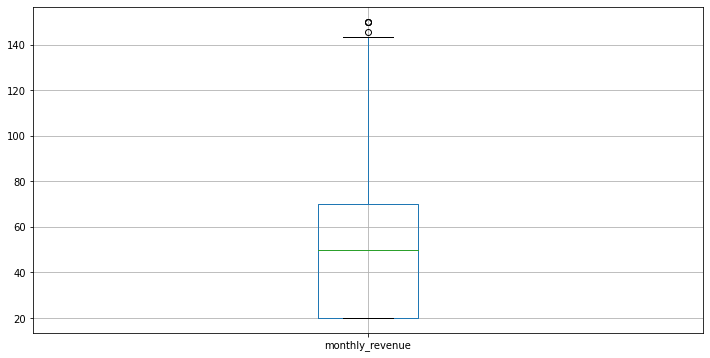

In [89]:
# removing outliers with IQR score method; double check with box plot
# monthly_revenue column for NY-NJ area
Q1_rev_ny = ny_nj['monthly_revenue'].quantile(0.25)
Q3_rev_ny = ny_nj['monthly_revenue'].quantile(0.75)
IQR_rev_ny = Q3_rev_ny - Q1_rev_ny
ny_nj = ny_nj.query('monthly_revenue > @Q1_rev_ny - 1.5 * @IQR_rev_ny and monthly_revenue < @Q3_rev_ny + 1.5 * @IQR_rev_ny')
ny_nj.boxplot(column=['monthly_revenue'], figsize=(12,6))

**Note:** We need to run the code multiple times to remove outliers completely.

<AxesSubplot:>

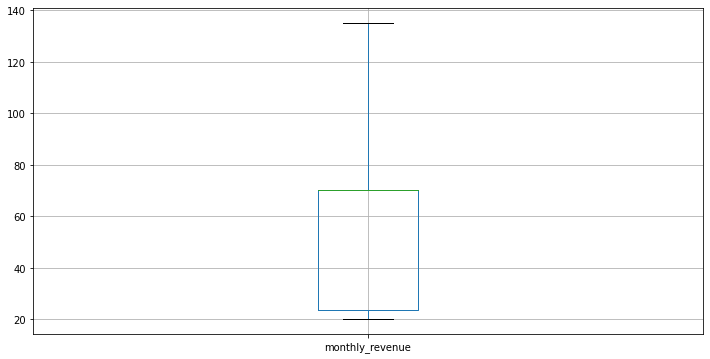

In [90]:
# removing outliers with IQR score method; double check with box plot
# monthly_revenue column for other regions
Q1_rev_other = other_regions['monthly_revenue'].quantile(0.25)
Q3_rev_other = other_regions['monthly_revenue'].quantile(0.75)
IQR_rev_other = Q3_rev_other - Q1_rev_other
other_regions = other_regions.query('monthly_revenue > @Q1_rev_other - 1.5 * @IQR_rev_other and monthly_revenue < @Q3_rev_other + 1.5 * @IQR_rev_other')
other_regions.boxplot(column=['monthly_revenue'], figsize=(12,6))

In [91]:
# variances of average revenues from 2 samples
print('NY-NJ area revenue variance:',ny_nj['monthly_revenue'].var())
print('Other regions revenue variance:',other_regions['monthly_revenue'].var())

NY-NJ area revenue variance: 1090.2667770657015
Other regions revenue variance: 807.9851235718609


In [92]:
ny_nj_rev= ny_nj.pivot_table(index='user_id', values='monthly_revenue', aggfunc='mean')
ny_nj_rev.columns=['average_revenue']
avg_rev_ny = ny_nj_rev.mean().round(2)
print('NY_NJ area users:', avg_rev_ny)

other_rev= other_regions.pivot_table(index='user_id', values='monthly_revenue', aggfunc='mean')
other_rev.columns=['average_revenue']
avg_rev_other = other_rev.mean().round(2)
print('NOT NY_NJ area users:',avg_rev_other)

NY_NJ area users: average_revenue    53.47
dtype: float64
NOT NY_NJ area users: average_revenue    54.65
dtype: float64


In [93]:
# taking sample from NY_NJ area
sample_ny = ny_nj.pivot_table(index=['user_id'], values='monthly_revenue', aggfunc='mean').sample(50)

# taking sample from other regions with size of 50
sample_other = other_regions.pivot_table(index='user_id', values='monthly_revenue', aggfunc='mean').sample(50)

# critical significance level
alpha = 0.05

# variances are not equal
results = st.ttest_ind(sample_other, sample_ny, equal_var=False)
print('p-value', results.pvalue)
if (results.pvalue < alpha):
    print('Reject the null hypothesis')
else:
    print('We can not reject the null hypothesis')

p-value [0.48730237]
We can not reject the null hypothesis


The result is quiet interesting. Although we see that there is a slight difference between revenues from two samples, (two regions), there is 65.6% probability(pvalue=0.65639921) that the revenues will be equal indicating that we can not reject the null hypothesis where we assumed that the revenues of both regions are equal.<br>
<b>Note:</b> We used sample() method to take equal sample size from our dataset.

<a id="5"></a>

### Step 5. Write an overall conclusion

<div class="alert alert-info">The ultimate goal of our analysis was to analyze clients' behavior and determine which prepaid plan brings in more revenue by testing hypotheses:<b><i>The average revenue from users of Ultimate and Surf calling plans differs.</i></b> and <b><i>The average revenue from users in NY-NJ area is different from that of the users from other regions.  </i></b><br>
We were provided 5 different datasets:<br>
    
<b>Description of the datasets:</b><br>
    
`df_users` - <b>Data on users:</b>
 - user_id — unique user identifier
 - first_name — user's name
 - last_name — user's last name
 - age — user's age (years)
 - reg_date — subscription date (dd, mm, yy)
 - churn_date — the date the user stopped using the service (if the value is missing, the calling plan was being used when this  data was retrieved)
 - city — user's city of residence
 - plan — calling plan name<br>

`df_plans`- <b> Description of the plans:</b>
 - plan_name — calling plan name
 - usd_monthly_fee — monthly charge in US dollars
 - minutes_included — monthly minute allowance
 - messages_included — monthly text allowance
 - mb_per_month_included — data volume allowance (in megabytes)
 - usd_per_minute — price per minute after exceeding the package limits (e.g., if the package includes 100 minutes, the 101st  minute will be charged)
 - usd_per_message — price per text after exceeding the package limits
 - usd_per_gb — price per extra gigabyte of data after exceeding the package limits (1 GB = 1024 megabytes)<br>

`df_calls` - <b> Data on calls:</b>
 - id — unique call identifier
 - call_date — call date
 - duration — call duration (in minutes)
 - user_id — the identifier of the user making the call<br>

`df_internet` - <b>Data on web sessions:</b>
 - id — unique session identifier
 - mb_used — the volume of data spent during the session (in megabytes)
 - session_date — web session date
 - user_id — user identifier<br>

`df_messages` - <b> Data on messages:</b>
 - id — unique text message identifier
 - message_date — text message date
 - user_id — the identifier of the user sending the text<br>

Before jumping right into analysis, we had to do data preprocessing, getting the dataset cleaned and accurate. We have looked through each dataset and made decisions on preprocessing, addind new columns, merging necessary tables together to create a single **consolidated data** for our further analysis.  The datasets have all three types of variables, quantitative, categorical and logical.
The data consolidation was started by changing certain data types(e.g.dates column) of each dataset to the right type we were looking for. `month` column was extracted from each dataset since we wanted to find data per month. Further we created tables via *pivot_table function* and merged together. After merging tables, we were able to see *messages, internet traffic, number of calls and minutes talked* per month.
When the data was consolidated and ready for further analysis, we calculated `monthly revenue` for each user and stored them in the column with the same name. After calculation of revenues for each users we looked at the revenues from clients of two different tariff plans. Let us have a glance at description of plans.<br> 

**Surf**  
 1. Monthly charge: 20 USD  
 2. 500 monthly minutes, 50 texts, and 15 GB of data  
 3. After exceeding the package limits:  
  - 1 minute: 3 cents  
  - 1 text message: 3 cents  
  - 1 GB of data: 10 USD

**Ultimate**
 1. Monthly charge: 70 USD  
 2. 3000 monthly minutes, 1000 text messages, and 30 GB of data  
 3. After exceeding the package limits:  
  - 1 minute: 1 cent  
  - 1 text message: 1 cent  
  - 1 GB of data: 7 USD  

As we see from information above, tariff plans differ from each other from start to bottom.*Surf's* monthly charge is much cheaper than *Ultimate* which is understandable that number of users are in favor of Surf plan. Almost 2/3 of total users have Surf tariff. Prior to testing hypotheses, we detected the outliers of each columns of two different plans(minutes, data, text messages) and especially monthly revenue values. By using box plots IQR scoring method we removed outliers and plotted histograms to compare client's behavior of two groups.

Finally, the very last step before conlusion was to test the two hypotheses that we were talking in the beginning. We used sample() method to get equal sample size from both dataset.In order to test your hypothesis that the means of the two statistical populations are equal based on samples taken from them, we applid the method scipy.stats.ttest_ind. Let us have a look at the results we got:  
 1. <b><i>The average revenue from users of Ultimate and Surf calling plans differs</i></b>  
 - H0 - The average revenue of Ultimate and Surf users are equal.  
 - H1 - The average revenue of Ultimate and Surf users are not equal.

We set the null hypothesis following the logic that H0 start with = sign. What study showed us:  
The p-value is 1.91477129 to the -7 power,  which is extremely small number tells us to reject the null hypothesis thus indicating that the average revenue of Ultimate and Surf plans differs, meaning that colleagues were right about the differences between two tariff's revenues.

 2. <b><i>The average revenue from users in NY-NJ area is different from that of the users from other regions.  </i></b>
 - H0 - The average revenue from users in NY-NJ and the average revenue from users in  other regions are equal.  
 - H1 - The average revenue from users in NY-NJ and the average revenue from users in  other regions are not equal.

The result is quiet interesting. Although we see that there is a slight difference between revenues from two samples, (two regions), there is 65.6% probability (pvalue=0.65639921) that the revenues will be equal indicating that we can not reject the null hypothesis where we assumed that the revenues of both regions are equal.<br>
